# Milestone 1 - Independent Project

## Author - Rodolfo Lerma



# Problem

Is there a feature or set of features that would yield to a higher home price for the King County Region?

# Abstract

The purpose of this analysis is to provide insights on what home features (if any) could/would yield to higher home prices in the King County Region (Washington, US).
This analysis was done by using the King County House Sales data set containing data from 2014 to 2015.
The data was obtain from the following website:
[King County House Sales from UW Website](https://startlearning.uw.edu/courses/course-v1:UW+DATASCI410+2019_Winter/courseware/20659760e6504409ace174ccaa96df89/d34173f9caee49dd8cf54784f26b3c35/1?activate_block_id=block-v1%3AUW%2BDATASCI410%2B2019_Winter%2Btype%40vertical%2Bblock%40cbcc25414f264fb99b4b3072d991df46)

This exploration analysis is divided in the following way:

**1) Analysis:**

- *First look at the data frame:*
    - First Look at the Distribution
    - Data Cleaning
    - Price distribution
    - Time series for Price

    
- *Correlations and deeper analysis:*
    - Location
    - Year of Built
    - Size and Condition
    - Structure and Distribution

**2) Conclusions**


**3) Appendix:**
- *Fig.A*
- *Fig.B*
- *Fig.C*
- *Fig.D*
- *Fig.E*
- *Fig.F*
    
**Note:** The analysis would improve in the next phases for this milestone.

# 1) Analysis

In [1]:
# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
#Load File
filename = 'kc_house_data.csv'
house_df = pd.read_csv(filename)
house_df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

## First look at the data

In [3]:
#Check the shape of the data array
house_df.shape

(21613, 21)

**Summary:**
- The data set contains 21,613 rows
- The data set has 21 Variables (columns)
- 5 variables are float64, 1 object and the rest (15) are int64

In [4]:
house_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [5]:
house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
house_df.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,...,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


### First Look at the Distribution

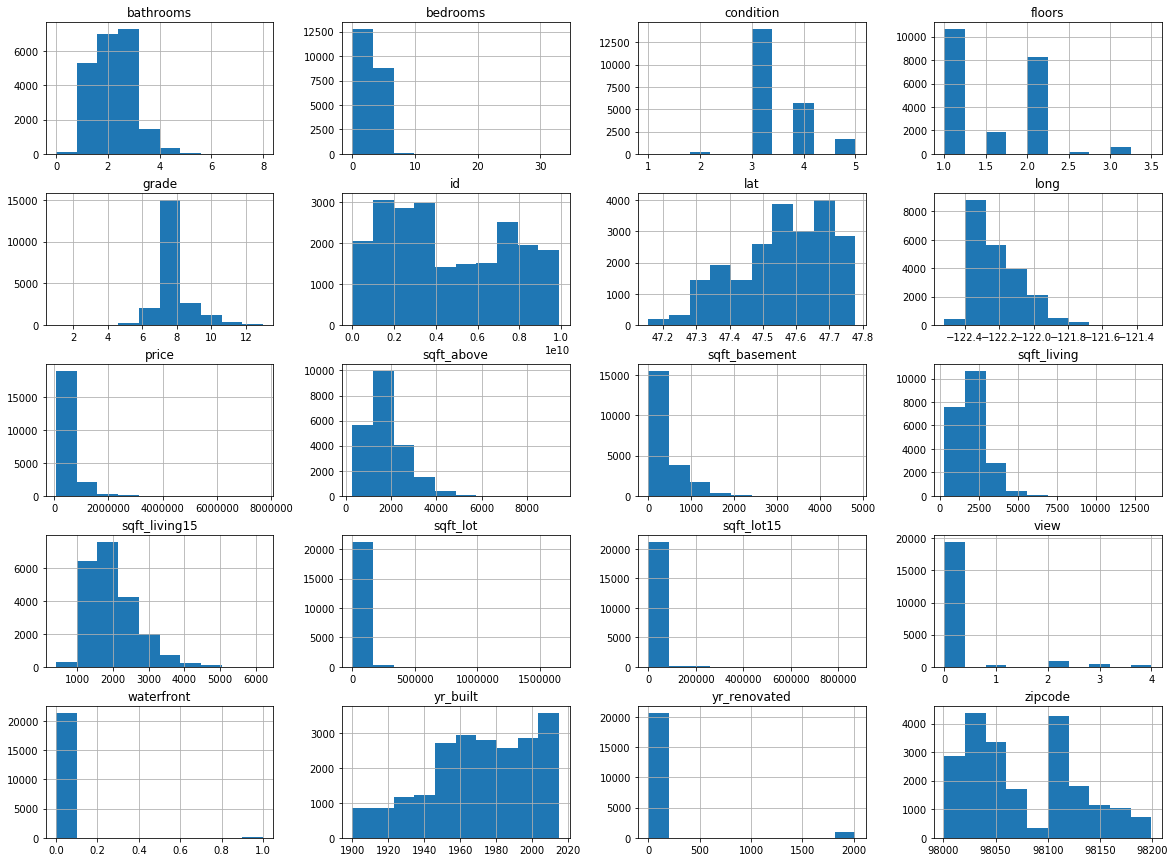

In [7]:
house_df.hist(figsize = (20,15))
plt.show()

### Data cleaning:

After looking at the raw data some cleaning was done since we are interested in the typical market for this region, therefore outliers will be removed.

In [8]:
min_price = house_df['price'].min().astype(int)
max_price = house_df['price'].max().astype(int)
print('The cheapest house in this data frame is: ' + min_price.astype(str))
print('The most expensive house in this data frame is: ' + max_price.astype(str))

The cheapest house in this data frame is: 75000
The most expensive house in this data frame is: 7700000


In [9]:
#Removing outliers based on Price:
LimitHi = np.mean(house_df['price']) + 2*np.std(house_df['price']) #Higher Limit for each of the numeric attributes
LimitLo = np.mean(house_df['price']) - 2*np.std(house_df['price']) #Lower Limit for each of the numeric attributes
FlagBad = (house_df['price'] < LimitLo) | (house_df['price'] > LimitHi) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
house_df = house_df.loc[FlagGood]

In [10]:
#The average price of a house: (after outlier removal)
avg_price = round(house_df['price'].mean(),0)
print('The average price of a house is:')
print(avg_price)

The average price of a house is:
487529.0


**Removing houses with more than 15 bedrooms and more than 6 bathrooms (since that is not typical)**

In [11]:
#Some cleaning of the data (outliers) will be removed since we are interested in the typical market for the region.
FlagBad = (house_df['bedrooms'] > 8) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
house_df = house_df.loc[FlagGood] 

In [12]:
FlagBad = (house_df['bathrooms'] > 6) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
house_df = house_df.loc[FlagGood] 

**Removing houses with sqft_lot bigger than (50,000). This is based on the data distribution and that not a lot of houses have a bigger than 50,000 sqft lot area**

In [13]:
FlagBad = (house_df['sqft_lot'] > 50000) #Boolean for values outside limits
FlagGood = ~FlagBad #Complement
house_df = house_df.loc[FlagGood] 

**Changing the Date attribute to a datetime variable and making it the index**

In [14]:
#Transforming the variable date into DateTime Variable
house_df.loc[:, 'date'] = pd.to_datetime(house_df.loc[:, 'date'])
house_df.set_index('date', inplace = True)

### Price distribution

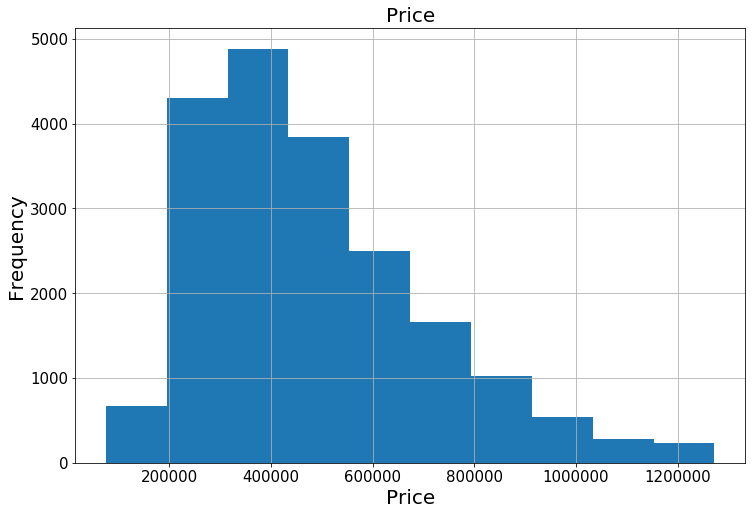

In [15]:
house_df['price'].hist(figsize = (12,8))
plt.xlabel('Price', fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Price', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

As it was seen before the houses' value goes from *75,000* to *1,300,000* with an average value close to *500,000*.

**Note:** This is after outliers were removed.

### Time series for Price

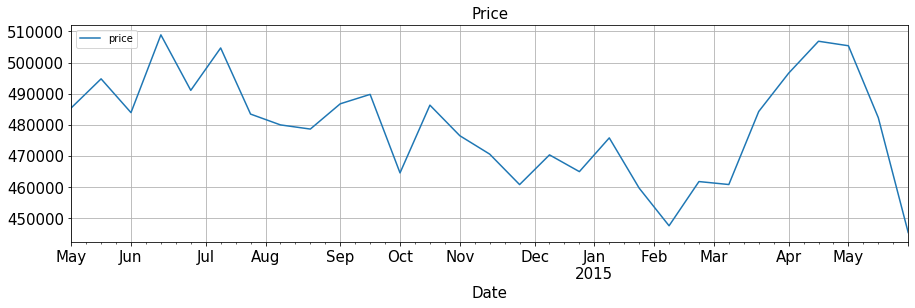

In [16]:
#Time series plot for Price
#To minimize the noise each data point seen here is the mean of a 2 Weeks sample
house_df[["price"]].resample("2W").mean().plot(figsize=(15,4))
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.xlabel('Date', fontsize = 15)
plt.title('Price',fontsize=15)
plt.legend(loc='upper left', fontsize=10)
plt.grid(True)

For the year 2014-2015 it is possible to see at least that:
- From December to March it seems that the house market is low.
- From April to Nov it seems that the market is high, being June and July the highest months.

## Correlations and deeper analysis

Looking at the correlation & scatter matrix plots down below we can notice some characteristics of the data:
- It seems that there is strong correlation between price and the following variables:
     - `bathrooms`
     - `sqft_living`
     - `grade`
     - `sqft_above`
     - `lat`
- A small correlation is seen for the following variables:
    - `bedrooms`
    - `floors`
    - `view`
    - `sqft_basement`

- Some variables do not add much (at this level of exploration) and will be removed from further analysis. They are:
    - `yr_renovated`: Most of the data has a 'zero' year, which could potentially mean that it has not been renovated since built. And there is no clear correlation between this variable and `price`. See **Fig.A** on appendix.
    - `sqft_lot` & `sqft_lot15`: These attributes do not add much value to the analysis and were removed from this exploration. See **Fig.B** on appendix.
    - `sqft_living15`: This variable is highly correlated to `sqft_living` and to keep simplicity only the later variable will be kept. See **Fig.C** on appendix.
    - `waterfront`: This variable only have two options (1 & 0 for have or do not have) and almost all the values fall into one of the options (value 0). See **Fig.D** on appendix.
    - `sqft_basement`: This variable will be removed as most of the houses do not have a basement. See **Fig.E** on appendix.

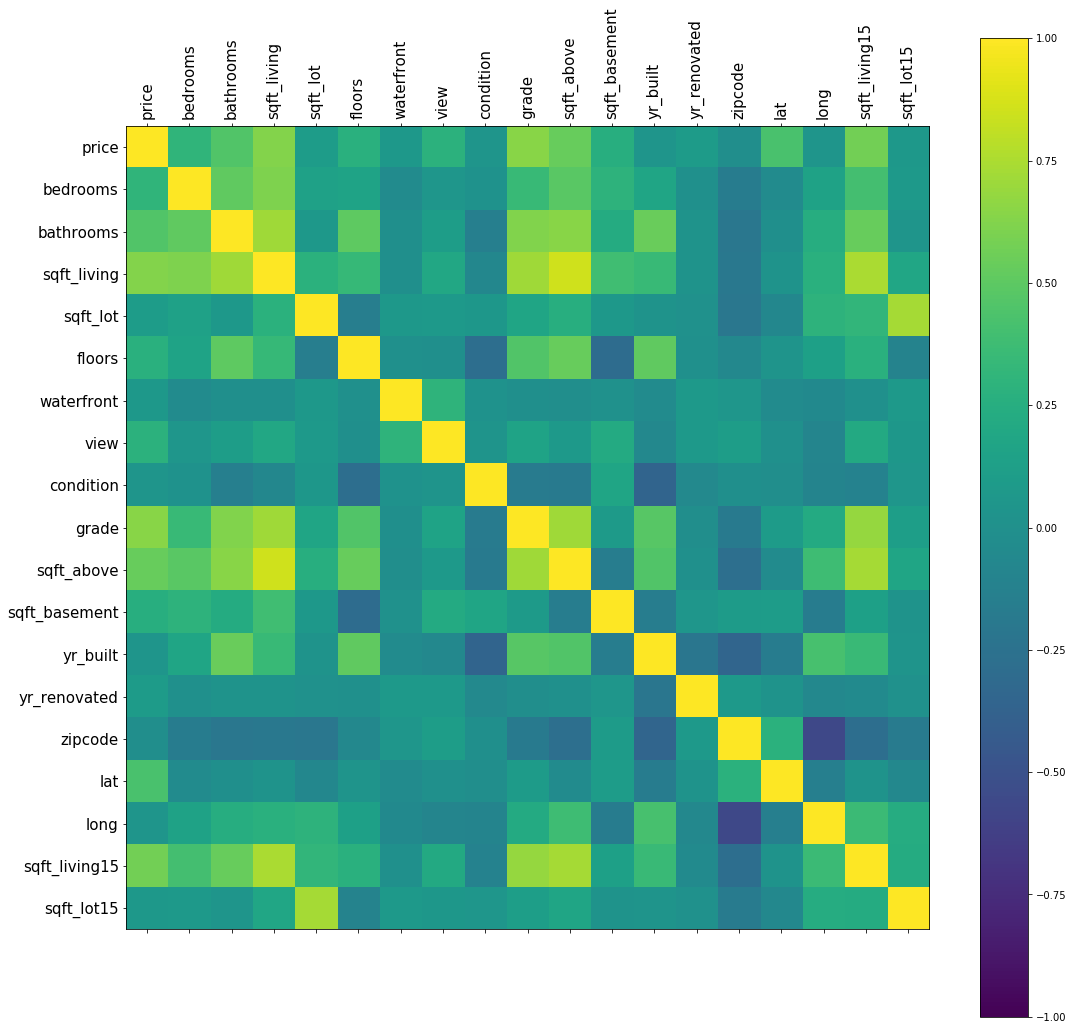

In [17]:
#Numeric columns
cols = ['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition','grade','sqft_above','sqft_basement','yr_built','yr_renovated','zipcode','lat','long','sqft_living15','sqft_lot15']
correlations = house_df[cols].corr()
# plot correlation matrix
fig = plt.figure(figsize = (18,18))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,19,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(cols,rotation = 90)
ax.set_yticklabels(cols)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
plt.show()

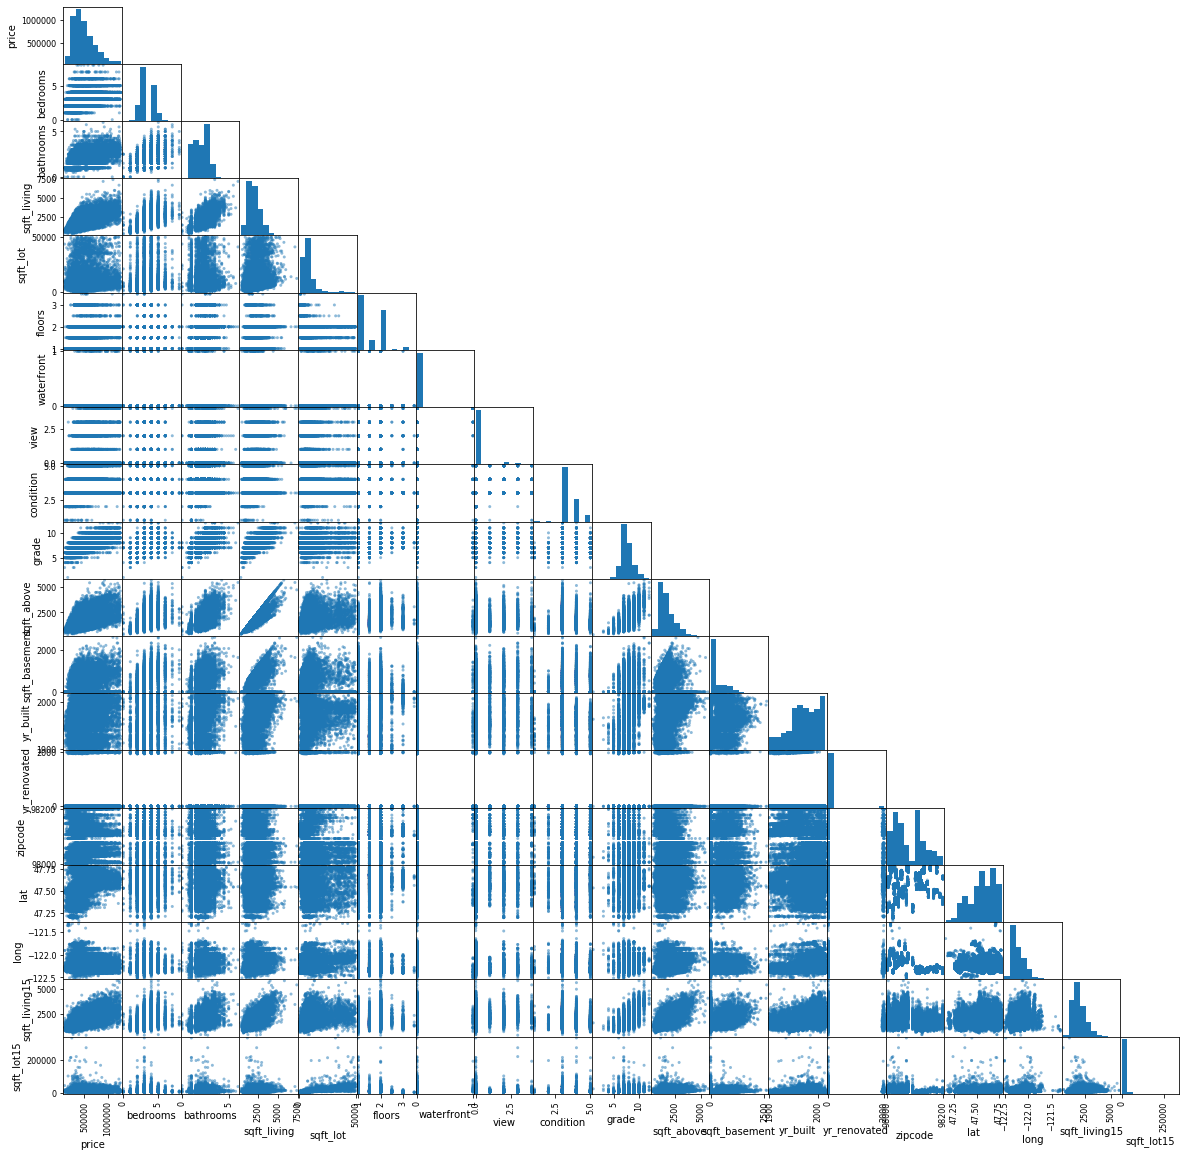

In [18]:
axes = scatter_matrix(house_df[cols], figsize = (20,20),diagonal='hist', alpha=0.5)
for i in range(np.shape(axes)[0]):
    for j in range(np.shape(axes)[1]):
        if i < j:
            axes[i,j].set_visible(False)

**In the following sections some characteristics of the relationships seen above will be explore by:**
- Location
- Year of Built
- Size and Condition
- Structure and Distribution

### Location

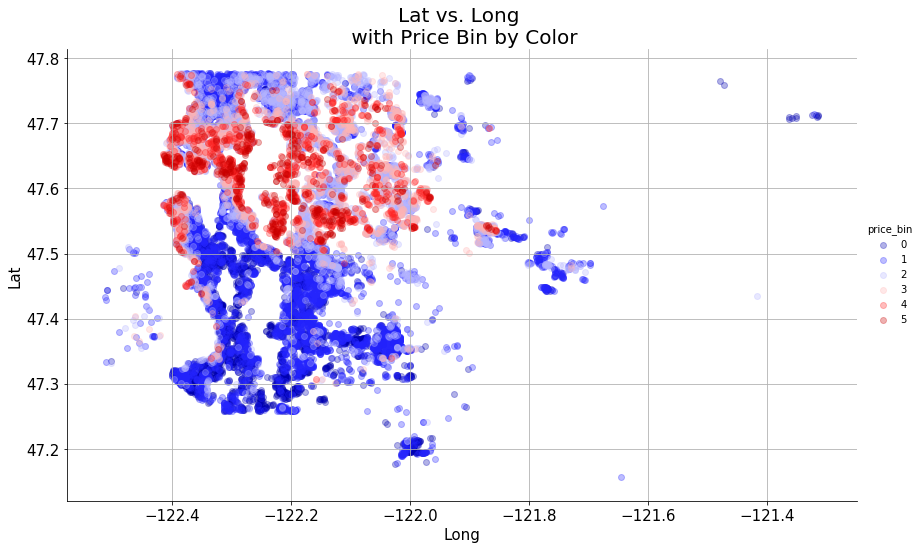

In [19]:
#New Variable Price Bin
house_df.loc[:, 'price_bin'] = pd.cut(house_df.loc[:, 'price'], bins = 6, labels = range(6))

sns.lmplot(x = 'long', y = 'lat', 
           data = house_df, 
           hue = "price_bin", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           height=7, aspect=1.7, #This line controls the size of the plot
           fit_reg = False)

plt.xlabel('Long', fontsize = 15)
plt.ylabel('Lat', fontsize = 15)
plt.title('Lat vs. Long \n with Price Bin by Color', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)


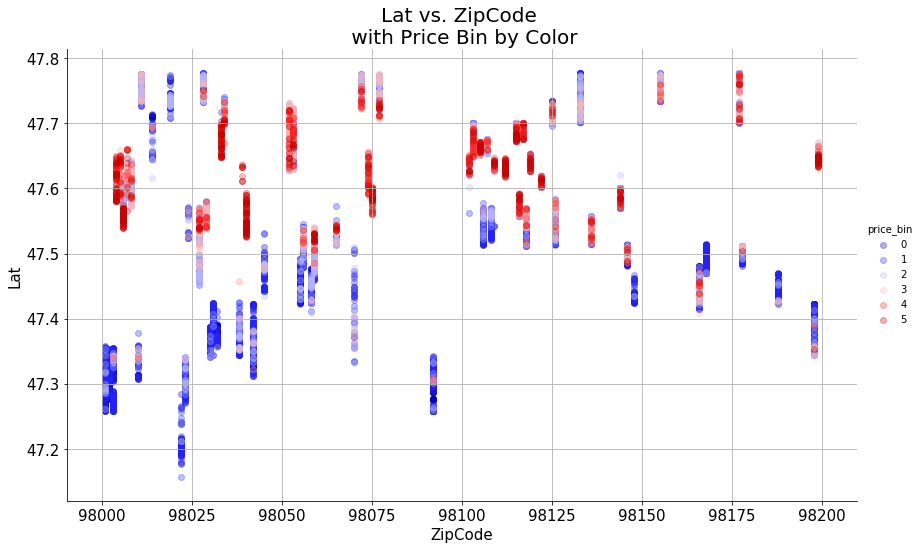

In [20]:
sns.lmplot(x = 'zipcode', y = 'lat', 
           data = house_df, 
           hue = "price_bin", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},
           height=7, aspect=1.7, #This line controls the size of the plot
           fit_reg = False)

plt.xlabel('ZipCode', fontsize = 15)
plt.ylabel('Lat', fontsize = 15)
plt.title('Lat vs. ZipCode \n with Price Bin by Color', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)

**From here it is possible to see the following:**
- Lat seems to be a better indication for the `price` of a house. Higher valued houses tend to concentrate around the 47.5 - 47.7 lat.
- Long does not provide a clear difference on what the `price` of a house is going to be.

## Year of Built

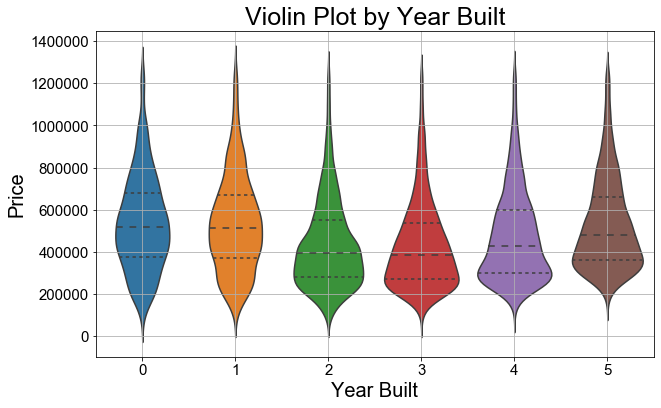

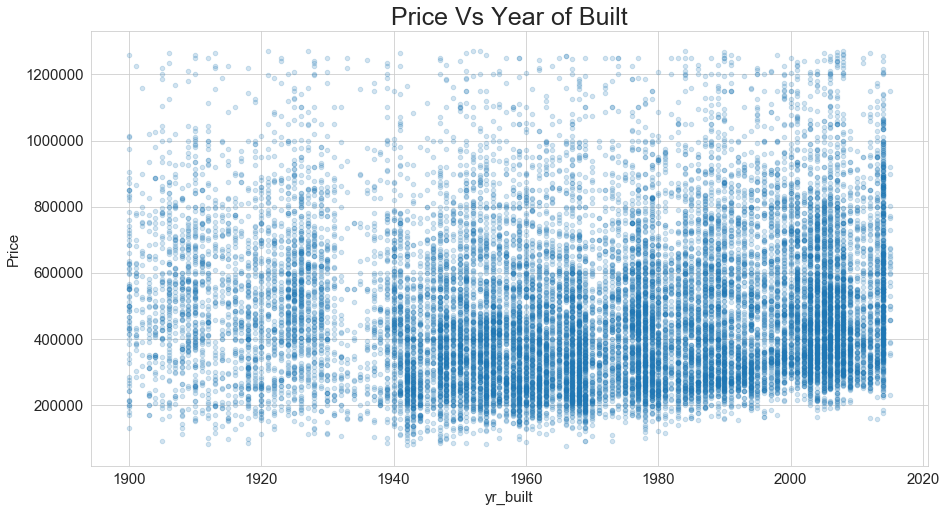

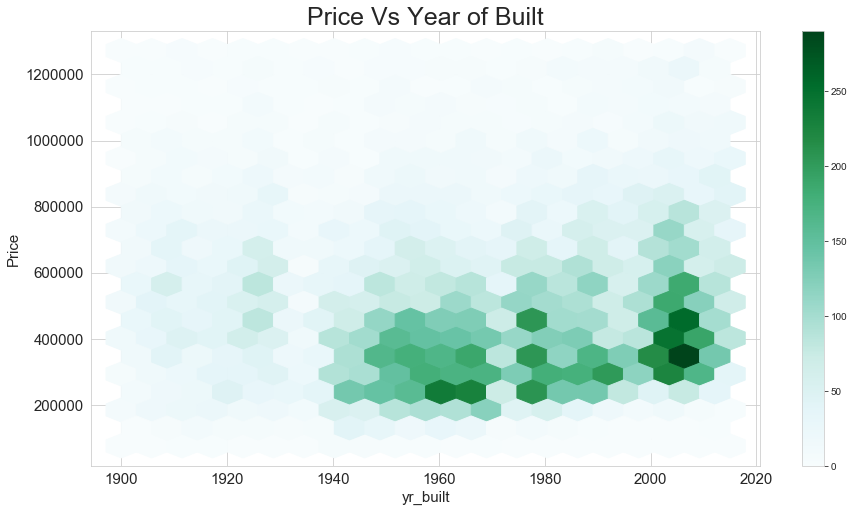

In [21]:
#New Variable Year_Built_bin
house_df.loc[:, 'yr_built_bin'] = pd.cut(house_df.loc[:, 'yr_built'], bins = 6, labels = range(6))

fig = plt.figure(figsize=(10,6)) # Define plot area
ax = fig.gca() # Define axis 
sns.set_style("whitegrid")
sns.violinplot(x = 'yr_built_bin', y = 'price',  data = house_df, ax = ax, split = True, inner='quart')
ax.set_title('Violin Plot by Year Built',fontsize=25)
ax.set_xlabel('Year Built',fontsize=20)
ax.set_ylabel('Price',fontsize=20)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(True)
plt.show()

columns = ['yr_built']
for i in columns:
    #Scatter plot (which looks more like a bar plot) for HeadCount Vs Day of the Week
    ax = plt.figure(figsize=(15, 8)).gca() # define axis
    house_df.plot.scatter(x = i, y = 'price', ax = ax, alpha = 0.2)
    ax.set_title('Price Vs Year of Built', fontsize = 25) # Give the plot a main title
    ax.set_ylabel('Price', fontsize = 15)# Set text for y axis
    ax.set_xlabel(i, fontsize = 15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.grid(True)
    plt.show()
    
    #Hexbin plot HeadCount Vs Hour
    ax = plt.figure(figsize=(15, 8)).gca() # define axis
    house_df.plot.hexbin(x = i, y = 'price', gridsize = 20, ax = ax)
    ax.set_title('Price Vs Year of Built', fontsize = 25) # Give the plot a main title
    ax.set_ylabel('Price', fontsize = 15)# Set text for y axis
    ax.set_xlabel(i, fontsize = 15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.grid(True)
    plt.show()

It is possible to notice the following:
- Most houses were built between 1960 and 2015, with the highest concentration of houses around 2010.
- There is not clear difference in price based on the year that were built.

**Note:** `yr_renovated` does not provide a lot of insight since most of the houses either have not been renovated or the data is not available. See **Fig.A** on appendix.

### Size and Condition

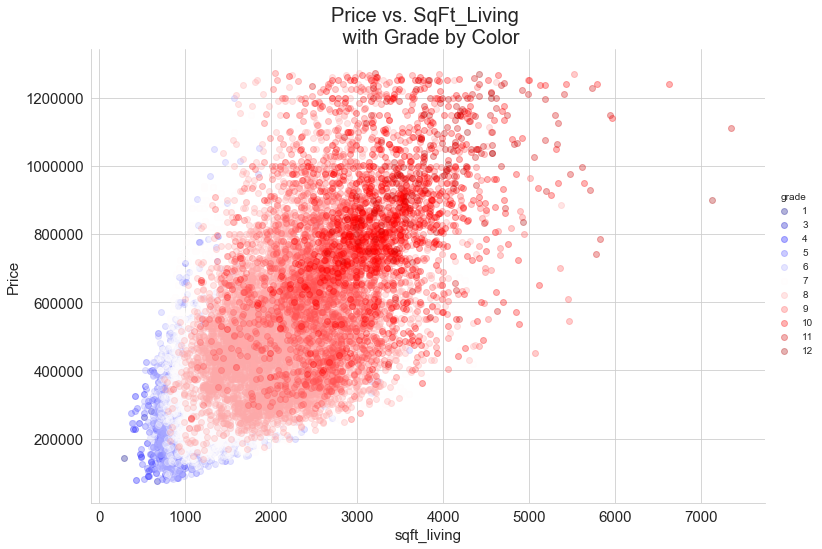

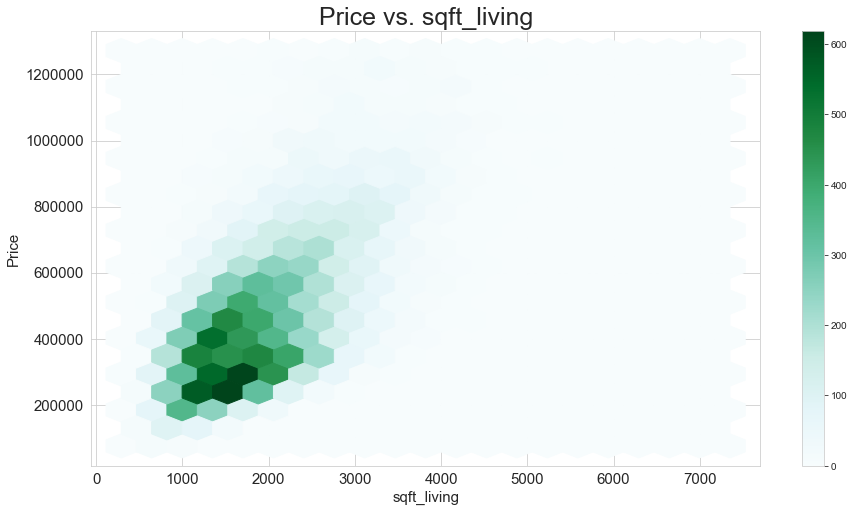

In [22]:
#Scatter plot for HeadCount Vs Hour with GameCode by Color
sns.lmplot(x = 'sqft_living', y = 'price', 
           data = house_df, 
           hue = "grade", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},height=7, aspect=1.5,
           fit_reg = False)
plt.xlabel('sqft_living', fontsize = 15)
plt.ylabel('Price',fontsize = 15)
plt.title('Price vs. SqFt_Living \n with Grade by Color', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

ax = plt.figure(figsize=(15, 8)).gca() # define axis
house_df.plot.hexbin(x = 'sqft_living', y = 'price', gridsize = 20, ax = ax)
ax.set_title('Price vs. sqft_living', fontsize = 25) # Give the plot a main title
ax.set_ylabel('Price', fontsize = 15)# Set text for y axis
ax.set_xlabel('sqft_living', fontsize = 15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(True)
plt.show()

From the figures above we can see the following:
- There is a direct correlation between `price` and `sqft_living`. As bigger the `sqft_living` as higher the `price`.
- Grade is a clear factor on the `price` as well. And houses with bigger `sqft_living` tend to have a better `grade`.
- Most of the houses in this analysis are between 1000 sqft and 2500 sqft.
- Pretty much the same conclusion can be obtained by using `sqft_above`. See **Fig.F** on appendix.

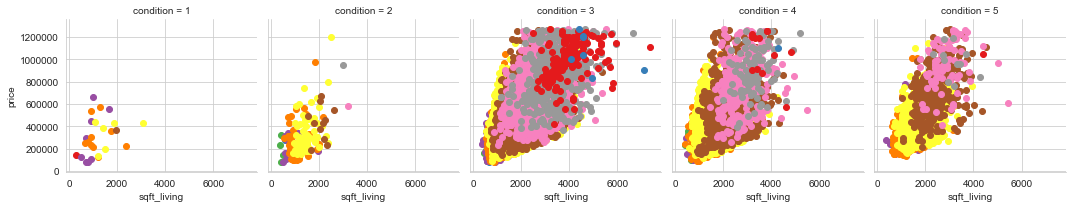

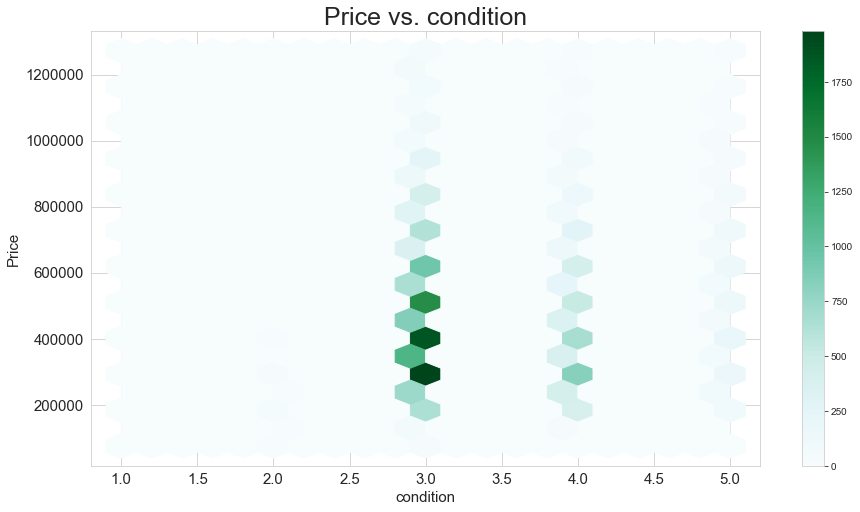

In [23]:
g = sns.FacetGrid(house_df, 
                  col="condition",
                  hue="grade", 
                  palette="Set1")
g = g.map(plt.scatter, "sqft_living", "price") 
plt.show()

ax = plt.figure(figsize=(15, 8)).gca() # define axis
house_df.plot.hexbin(x = 'condition', y = 'price', gridsize = 20, ax = ax)
ax.set_title('Price vs. condition', fontsize = 25) # Give the plot a main title
ax.set_ylabel('Price', fontsize = 15)# Set text for y axis
ax.set_xlabel('condition', fontsize = 15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(True)
plt.show()


From the plot above it is possible to notice:
- Above `condition`= 3 the `price` of the houses stay pretty much the same (hence the requirement seem to be that as long as the `condition` is at least a number 3 the `price` will no be affected).
- Most of the houses in this data set have a `condition` 3 & 4.
- As seen in the previous plots, `grade` seems to be of more importante in relation to `price`.

### Structure & Distribution

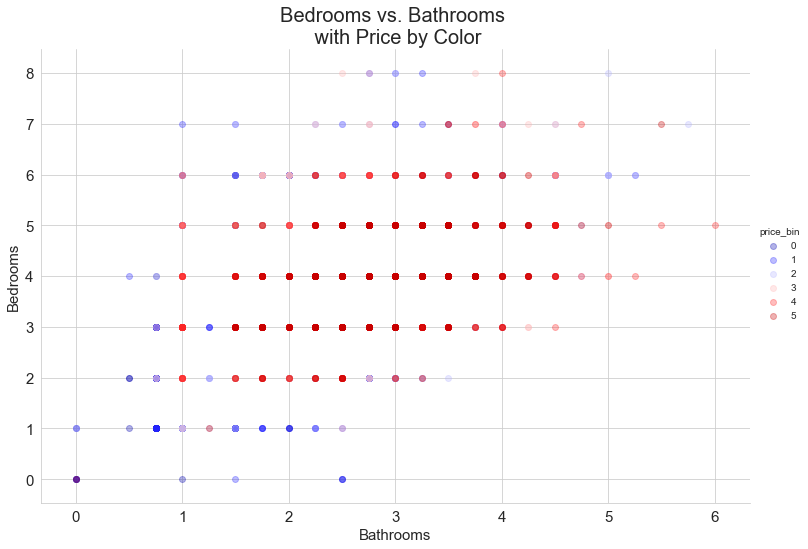

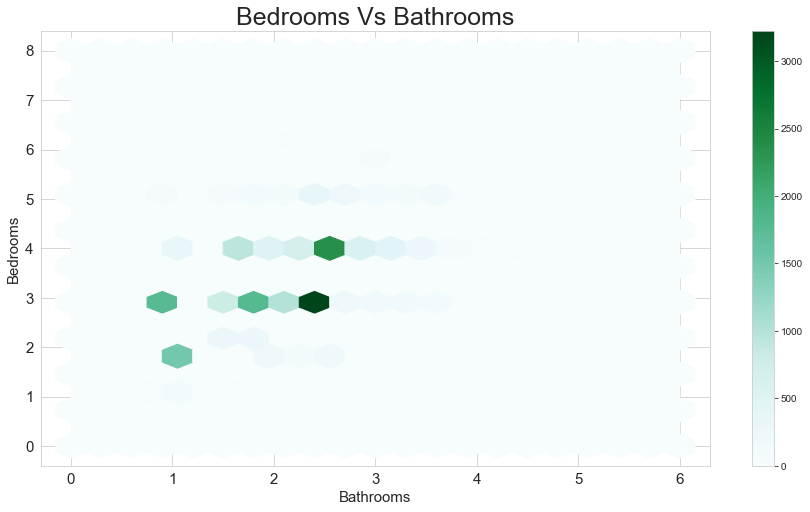

In [24]:
#Scatter plot for HeadCount Vs Hour with GameCode by Color

sns.lmplot(x = 'bathrooms', y = 'bedrooms', 
           data = house_df, 
           hue = "price_bin", 
           palette="seismic", 
           scatter_kws={'alpha':0.3},height=7, aspect=1.5,
           fit_reg = False)
plt.xlabel('Bathrooms', fontsize = 15)
plt.ylabel('Bedrooms',fontsize = 15)
plt.title('Bedrooms vs. Bathrooms \n with Price by Color', fontsize = 20)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

ax = plt.figure(figsize=(15, 8)).gca() # define axis
house_df.plot.hexbin(x = 'bathrooms', y = 'bedrooms', gridsize = 20, ax = ax)
ax.set_title('Bedrooms Vs Bathrooms', fontsize = 25) # Give the plot a main title
ax.set_ylabel('Bedrooms', fontsize = 15)# Set text for y axis
ax.set_xlabel('Bathrooms', fontsize = 15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(True)
plt.show()

Here it we can see:
 - Most of the houses in this list have between 2 - 4 `bedrooms` (with the highest concentration in 3)
 - Most of the houses have between 1 to 2.5 `bathrooms` (with the highest concentration in 2.5 `bathrooms`)
 - The highest valued homes (`price`) are have between 2 to 4 `bathrooms` and between 3 to 5 `bedrooms`.

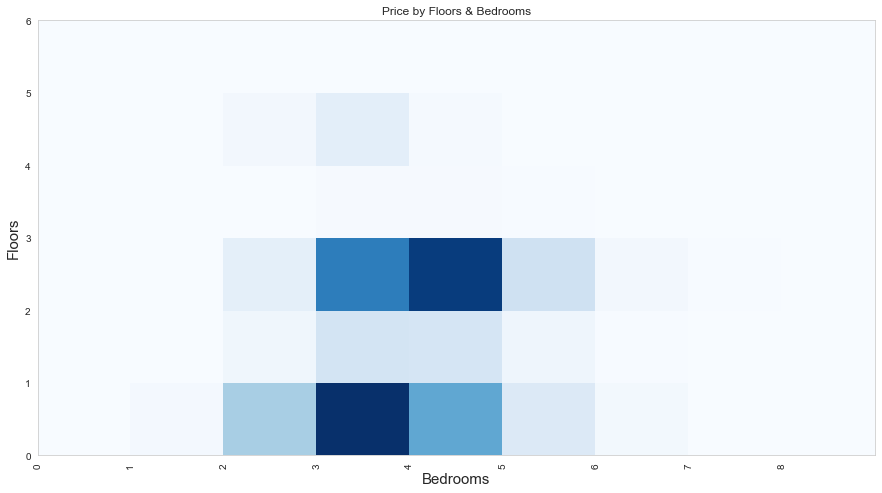

The Values for Floor are:
['1' '3' '2' '5' '4' '6']


In [25]:
#Heat Plots
#Creating copies of the columns as string values
house_df.loc[:,'floors_c'] = house_df['floors'].astype(str)

#Consolidating values:
house_df.loc[house_df.loc[:, "floors_c"] == "1.0", "floors_c"] = "1"
house_df.loc[house_df.loc[:, "floors_c"] == "1.5", "floors_c"] = "2"
house_df.loc[house_df.loc[:, "floors_c"] == "2.0", "floors_c"] = "3"
house_df.loc[house_df.loc[:, "floors_c"] == "2.5", "floors_c"] = "4"
house_df.loc[house_df.loc[:, "floors_c"] == "3.0", "floors_c"] = "5"
house_df.loc[house_df.loc[:, "floors_c"] == "3.5", "floors_c"] = "6"

house_df.loc[:,'bedrooms_c'] = house_df['bedrooms'].astype(str)

x = pd.crosstab(house_df['floors'], house_df['bedrooms_c'], values=house_df['price'], aggfunc='sum', normalize=True)
#Heat Map Plot
ax = plt.figure(figsize=(15, 8)).gca() # define axis
ax.pcolor(x, cmap = 'Blues')
ax.set_xticks(range(x.shape[1]))
ax.set_xticklabels(x.columns, rotation=90)
ax.set_xlabel('Bedrooms', fontsize = 15)
ax.set_ylabel('Floors', fontsize = 15)
ax.set_title('Price by Floors & Bedrooms')
plt.show()

print('The Values for Floor are:')
print(house_df['floors_c'].unique())

After some quick conversions it is possible to see that:
- Houses with 1 and 1.5 `floors` with 4-5 `bedrooms` are the most valued homes

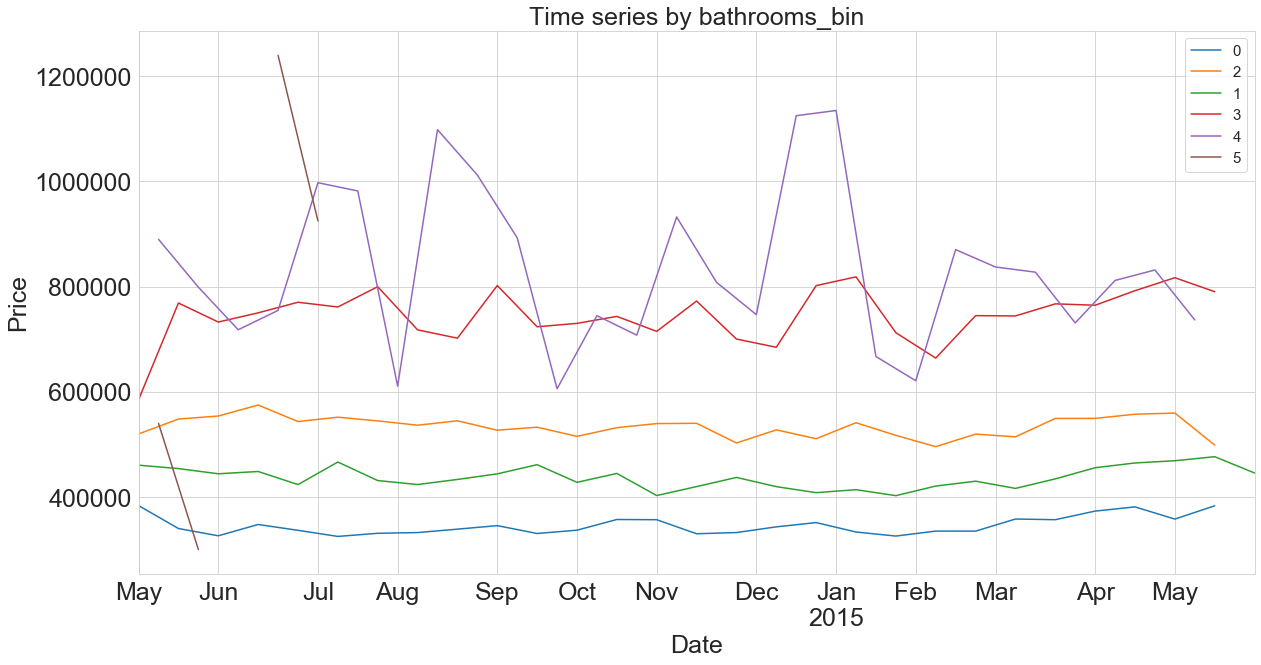

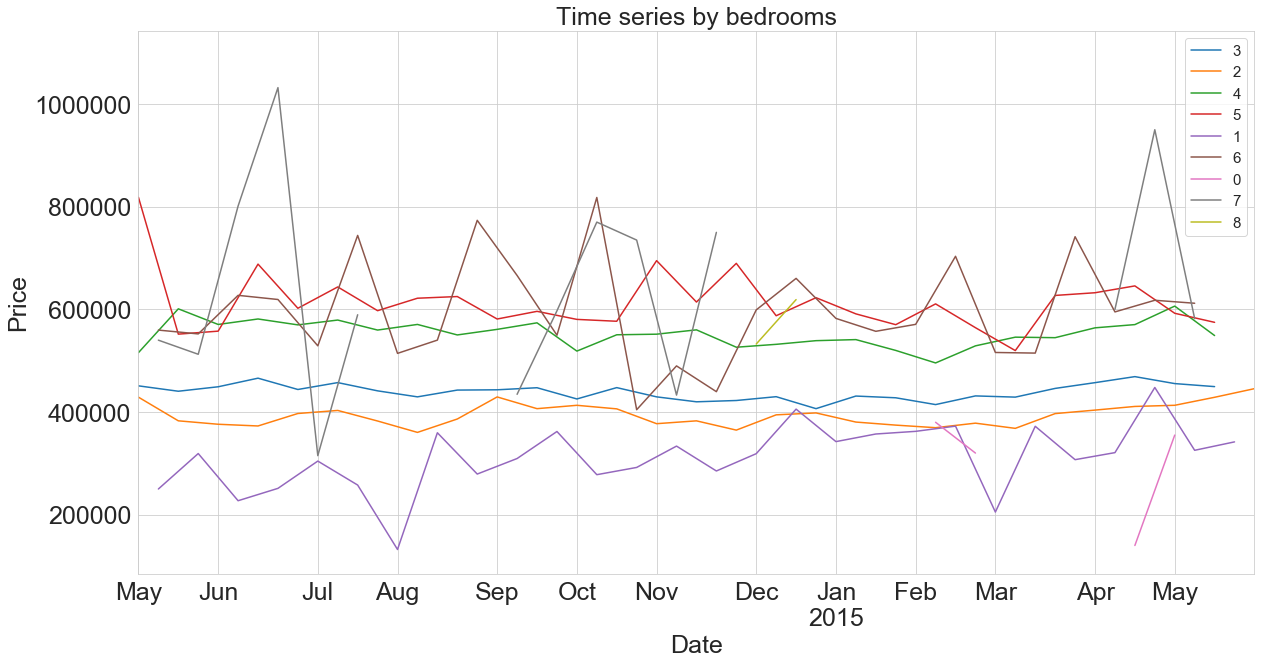

In [26]:
#A list for the 2 columns that we want for the time plots
#creating a column for the bathrooms, but as a bin quantity
house_df.loc[:, 'bathrooms_bin'] = pd.cut(house_df.loc[:, 'bathrooms'], bins = 6, labels = range(6))

structure = ['bathrooms_bin','bedrooms']

for i in structure:
    #Group the Data Frame Headcount_df by 'GameCode'
    grouped = house_df.groupby(house_df[i])

    #List of the Unique values from the GameCode column
    w = house_df[i].unique()

    # Code to create a dictionary for a variable called Group i (index) with the name of the game as value
    d = {} #Empty Dictionary
    for j in range(len(w)):
        d["group"+str(j)] = grouped.get_group(w[j])
    
    # Plot a time plot for each of the groups created above in the same plot
    ax = plt.figure(figsize=(20, 10)).gca() # define axis
    #This creates each line for each particular group
    for x in range(len(w)):
        d["group"+str(x)]['price'].resample("2W").mean().plot(label= w[x], ax = ax)
    ax.set_xlabel('Date',fontsize=25)
    ax.tick_params(axis="x", labelsize=25)
    ax.tick_params(axis="y", labelsize=25)
    ax.set_ylabel('Price',fontsize=25)
    ax.set_title('Time series by ' + i,fontsize=25)
    ax.legend(loc='upper right', fontsize=15)
    ax.grid(True)

From the plots above it is possible to see:
*Bathrooms time plot:*
- Houses with 4 `bathrooms` (bin number 3) are the most valued (with a steady behavior).
- There is a clear difference in `price` based on `bathrooms`.

*Bedrooms time plot:*
- 4 to 5 `bedrooms` are the highest valued homes (with a steady behavior).
- 2 to 3 `bedrooms` are near the average `price`.
- 1 and above 5 `bedrooms` have an erratic behavor.

# 2) Conclusion/Summary:

**Time related:**
- From December to March it seems that the house market is low.
- From April to Nov it seems that the market is high, being June and July the highest months.
- Year of Built does not seem to be a factor on the home `price`.
- 4 to 5 `bedrooms` are the highest valued homes thru time (with a steady behavior).

**Location related:**
- Lat seems to be a better indication for the `price` of a house. Higher value houses tend to concentrate around the 47.5 - 47.7 lat.

**Size and Condition related:**
- `sqft_living` & `grade` are in direct correlation with the home `price`.
- An insight from the variable `condition` is that as long as is at least a 3 the home `price` gets to a good level.

**Structure and Distribution:**
- The highest valued homes (`price`) have between 2 to 4 `bathrooms` & 3 to 5 `bedrooms`.
- Houses with 1 and 1.5 `floors` with 4-5 `bedrooms` are the most valued homes.

# 3) Appendix

In this section it is possible to see all the plots that were analyzed for this exploration:

## Fig.A

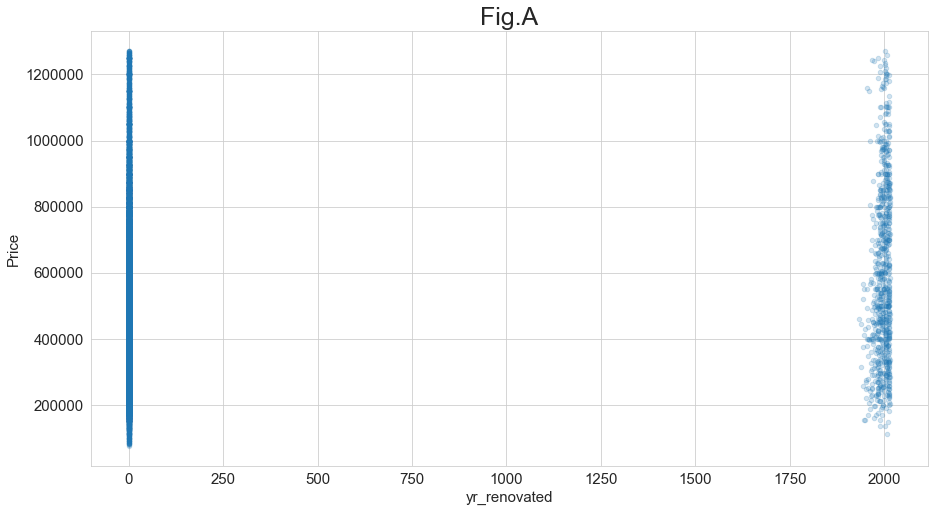

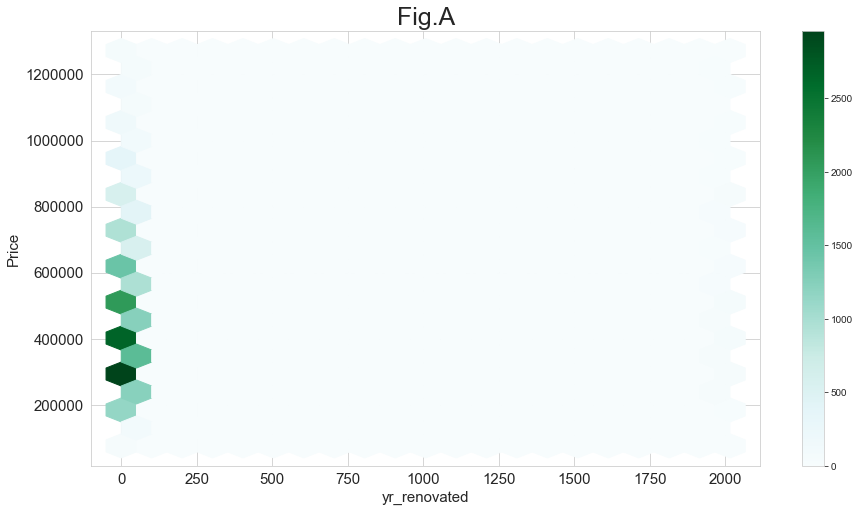

In [27]:
columns = ['yr_renovated']
for i in columns:
    #Scatter plot (which looks more like a bar plot) for HeadCount Vs Day of the Week
    ax = plt.figure(figsize=(15, 8)).gca() # define axis
    house_df.plot.scatter(x = i, y = 'price', ax = ax, alpha = 0.2)
    ax.set_title('Fig.A', fontsize = 25) # Give the plot a main title
    ax.set_ylabel('Price', fontsize = 15)# Set text for y axis
    ax.set_xlabel(i, fontsize = 15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.grid(True)
    plt.show()
    
    #Hexbin plot HeadCount Vs Hour
    ax = plt.figure(figsize=(15, 8)).gca() # define axis
    house_df.plot.hexbin(x = i, y = 'price', gridsize = 20, ax = ax)
    ax.set_title('Fig.A', fontsize = 25) # Give the plot a main title
    ax.set_ylabel('Price', fontsize = 15)# Set text for y axis
    ax.set_xlabel(i, fontsize = 15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.grid(True)
    plt.show()

**As it can be seen here, most of the houses has not been renovated or the data is not available. The ones that were renovated were reworked around the 2000's.**

## Fig.B

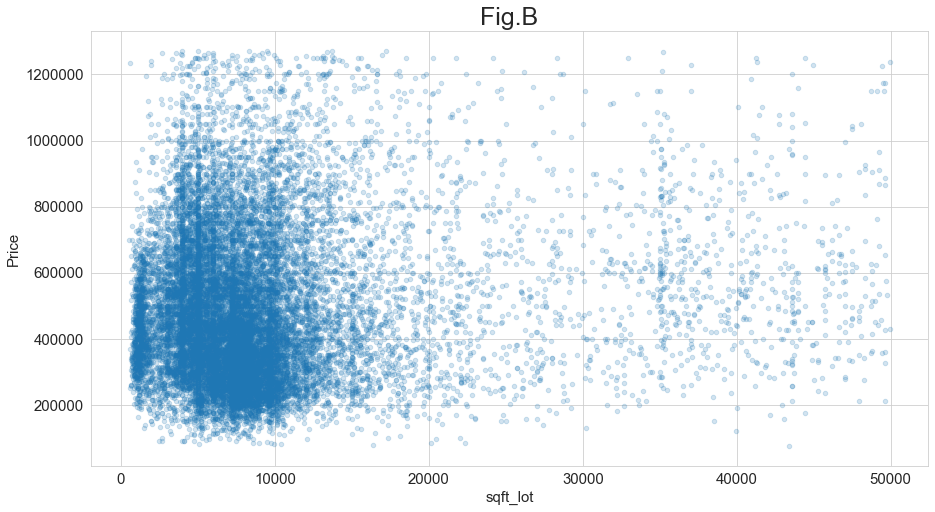

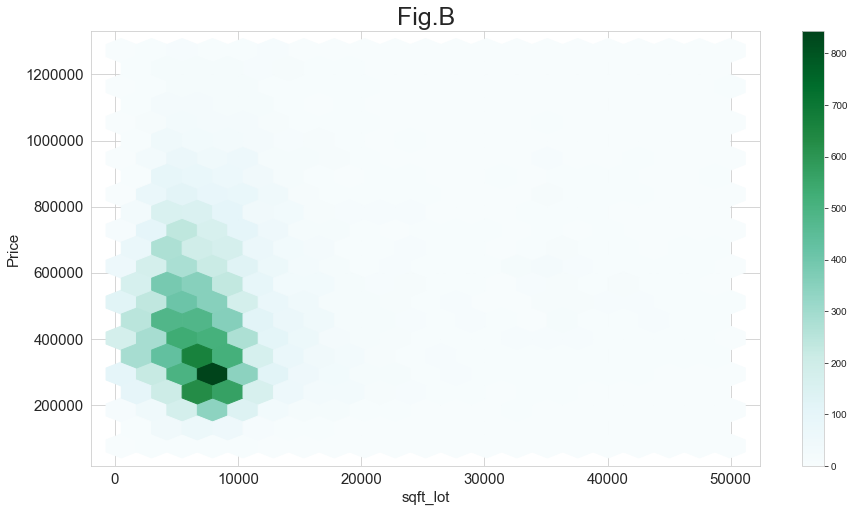

In [28]:
columns = ['sqft_lot']
for i in columns:
    #Scatter plot (which looks more like a bar plot) for HeadCount Vs Day of the Week
    ax = plt.figure(figsize=(15, 8)).gca() # define axis
    house_df.plot.scatter(x = i, y = 'price', ax = ax, alpha = 0.2)
    ax.set_title('Fig.B', fontsize = 25) # Give the plot a main title
    ax.set_ylabel('Price', fontsize = 15)# Set text for y axis
    ax.set_xlabel(i, fontsize = 15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.grid(True)
    plt.show()
    
    #Hexbin plot HeadCount Vs Hour
    ax = plt.figure(figsize=(15, 8)).gca() # define axis
    house_df.plot.hexbin(x = i, y = 'price', gridsize = 20, ax = ax)
    ax.set_title('Fig.B', fontsize = 25) # Give the plot a main title
    ax.set_ylabel('Price', fontsize = 15)# Set text for y axis
    ax.set_xlabel(i, fontsize = 15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.grid(True)
    plt.show()

**Not a clear clorrelation between price & Sqft_lot. The most common value it is around 8,000 sqft**

## Fig.C

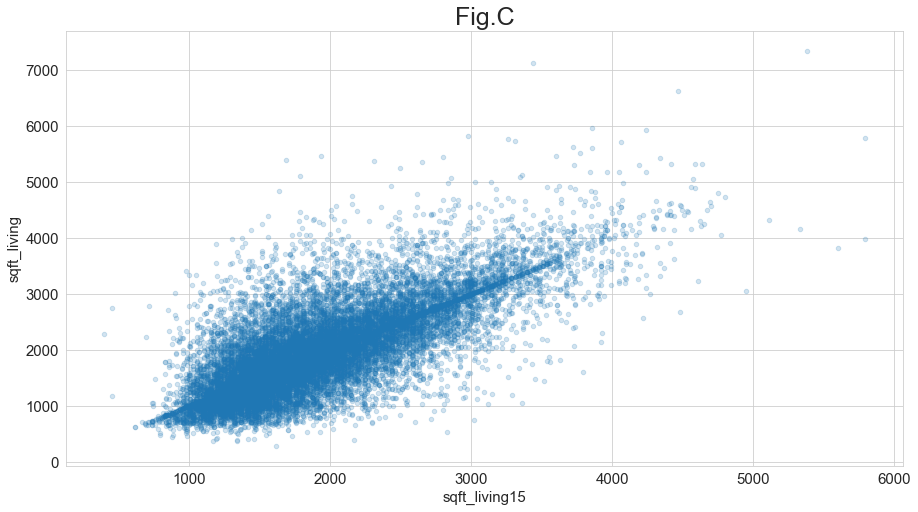

In [29]:
columns = ['sqft_living15']
for i in columns:
    ax = plt.figure(figsize=(15, 8)).gca() # define axis
    house_df.plot.scatter(x = i, y = 'sqft_living', ax = ax, alpha = 0.2)
    ax.set_title('Fig.C', fontsize = 25) # Give the plot a main title
    ax.set_ylabel('sqft_living', fontsize = 15)# Set text for y axis
    ax.set_xlabel(i, fontsize = 15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.grid(True)
    plt.show()

**There is an almost 1 to 1 correlation between this 2 variables, therefore we will keep just one for this exploration**

## Fig.D

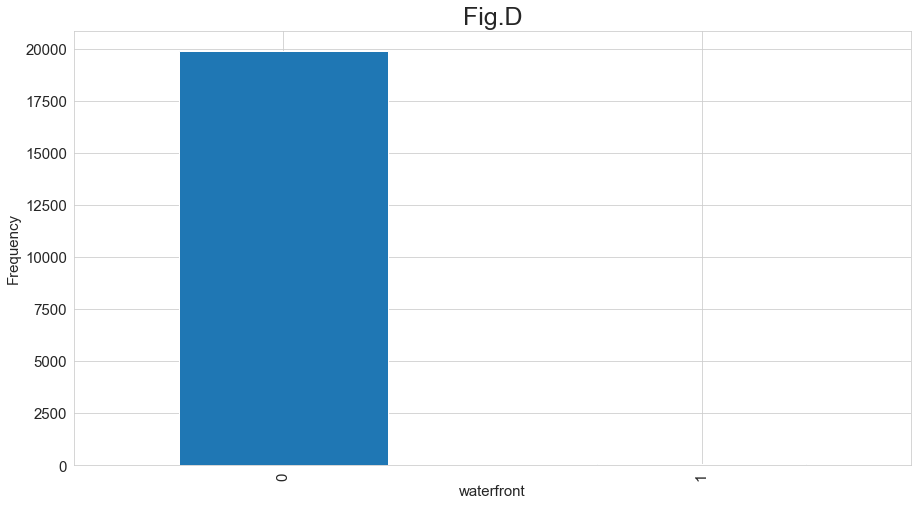

In [30]:
house_df['waterfront'].value_counts().plot(kind='bar',figsize = (15,8))
plt.xlabel('waterfront', fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.title('Fig.D', fontsize = 25)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

**Most of the houses (almost all of them) do not have a waterfront, therefore the variable will be removed from the analysis**

## Fig.E

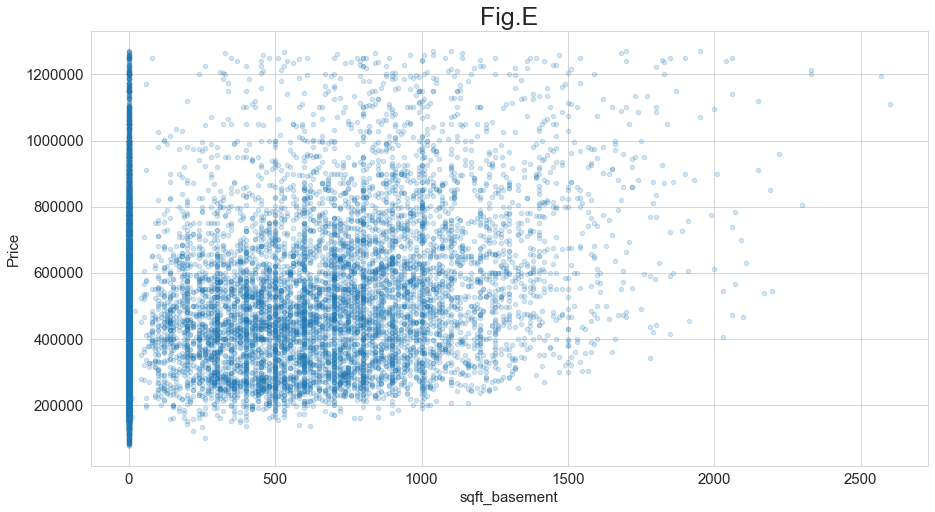

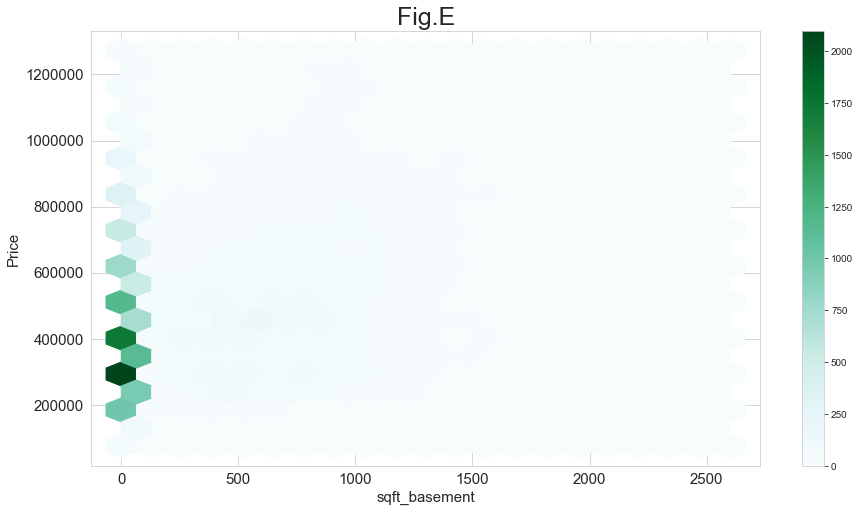

In [31]:
columns = ['sqft_basement']
for i in columns:
    #Scatter plot (which looks more like a bar plot) for HeadCount Vs Day of the Week
    ax = plt.figure(figsize=(15, 8)).gca() # define axis
    house_df.plot.scatter(x = i, y = 'price', ax = ax, alpha = 0.2)
    ax.set_title('Fig.E', fontsize = 25) # Give the plot a main title
    ax.set_ylabel('Price', fontsize = 15)# Set text for y axis
    ax.set_xlabel(i, fontsize = 15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.grid(True)
    plt.show()
    
    #Hexbin plot HeadCount Vs Hour
    ax = plt.figure(figsize=(15, 8)).gca() # define axis
    house_df.plot.hexbin(x = i, y = 'price', gridsize = 20, ax = ax)
    ax.set_title('Fig.E', fontsize = 25) # Give the plot a main title
    ax.set_ylabel('Price', fontsize = 15)# Set text for y axis
    ax.set_xlabel(i, fontsize = 15)
    ax.tick_params(axis="x", labelsize=15)
    ax.tick_params(axis="y", labelsize=15)
    ax.grid(True)
    plt.show()

**Either most of the houses do not have a basement or the data is not available**

## Fig.F

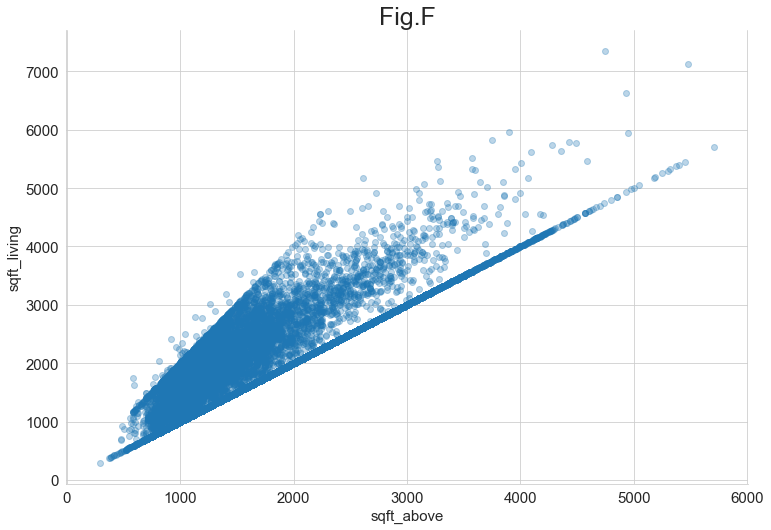

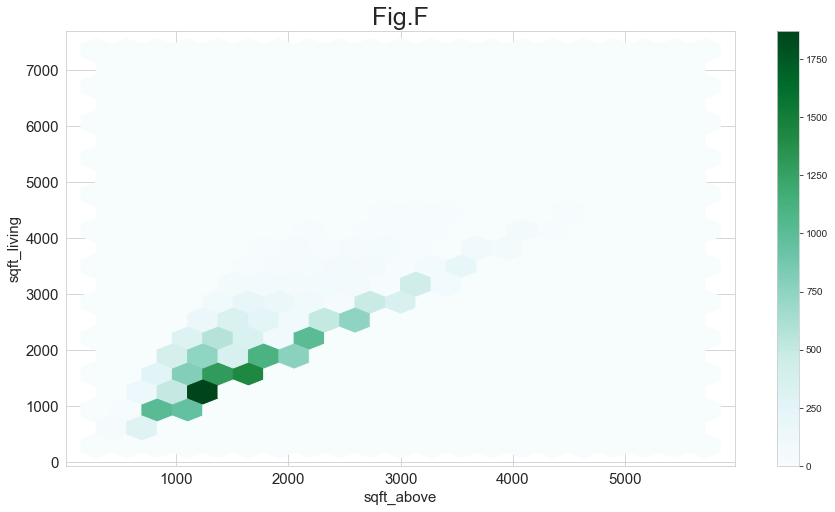

In [32]:
#Scatter plot for HeadCount Vs Hour with GameCode by Color
sns.lmplot(x = 'sqft_above', y = 'sqft_living', 
           data = house_df, 
           palette="seismic", 
           scatter_kws={'alpha':0.3},height=7, aspect=1.5,
           fit_reg = False)
plt.xlabel('sqft_above', fontsize = 15)
plt.ylabel('sqft_living',fontsize = 15)
plt.title('Fig.F', fontsize = 25)
plt.tick_params(axis="x", labelsize=15)
plt.tick_params(axis="y", labelsize=15)
plt.grid(True)
plt.show()

ax = plt.figure(figsize=(15, 8)).gca() # define axis
house_df.plot.hexbin(x = 'sqft_above', y = 'sqft_living', gridsize = 20, ax = ax)
ax.set_title('Fig.F', fontsize = 25) # Give the plot a main title
ax.set_ylabel('sqft_living', fontsize = 15)# Set text for y axis
ax.set_xlabel('sqft_above', fontsize = 15)
ax.tick_params(axis="x", labelsize=15)
ax.tick_params(axis="y", labelsize=15)
ax.grid(True)
plt.show()

**We can see that the `sqft_living` in general is bigger than `sqft_above` and that there is a pretty close correlation between them.**